# Транспортно-логистическая задача

In [63]:
import random
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [64]:
import warnings
warnings.filterwarnings("ignore")

## Задание № 1
Реализация ориентированного графа и решение задачи многокритериальной оптимизации в рамках транспортной задачи

In [65]:
def draw_graph(name_graph):

  pos = {
    0: np.array([0,0]),
    1: np.array([1,1]),
    2: np.array([2,1]),
    3: np.array([4,1]),
    4: np.array([5,0.5]),
    11: np.array([5,-0.5]),
    'T': np.array([6,0]),
    5: np.array([1,0]),
    6: np.array([2,0]),
    7: np.array([3,0]),
    10: np.array([4,-1]),
    8: np.array([1,-1]),
    9: np.array([2,-1]),
  }
  
  nx.draw(name_graph, pos=pos, with_labels=True,
          arrows=True, node_color="orange")
  
  edge_labels = nx.get_edge_attributes(name_graph, "weight")
  nx.draw_networkx_edge_labels(name_graph, pos=pos, edge_labels=edge_labels)
  plt.show()

### Создание взвешенного ориентированного графа

In [66]:
# Создание ориентированного графа
G = nx.DiGraph()

# Добавление ребер и вершин
edges = [
    (0, 1), (0, 5), (0, 8), (1, 2), (2, 3),
    (3, 4), (3, 11), (4, 'T'),
    (5, 6), (6, 7), (6, 10),
    (7, 4), (7, 11), (8, 6), (8, 9),
    (9, 10), (10, 11), (11, 'T')]

G.add_edges_from(edges)

# Добавление весов
for u, v in G.edges():
    G[u][v]['cost'] = random.randint(2, 9)
    G[u][v]['time'] = random.randint(2, 9)
    G[u][v]['weight'] = (G[u][v]["cost"], G[u][v]["time"])

In [67]:
print("Рёбра графа вместе со множеством весов:")
for edge in G.edges(data=True):
  print(edge, end='\n')

Рёбра графа вместе со множеством весов:
(0, 1, {'cost': 6, 'time': 5, 'weight': (6, 5)})
(0, 5, {'cost': 4, 'time': 8, 'weight': (4, 8)})
(0, 8, {'cost': 8, 'time': 7, 'weight': (8, 7)})
(1, 2, {'cost': 6, 'time': 8, 'weight': (6, 8)})
(5, 6, {'cost': 9, 'time': 7, 'weight': (9, 7)})
(8, 6, {'cost': 7, 'time': 5, 'weight': (7, 5)})
(8, 9, {'cost': 7, 'time': 4, 'weight': (7, 4)})
(2, 3, {'cost': 6, 'time': 6, 'weight': (6, 6)})
(3, 4, {'cost': 7, 'time': 8, 'weight': (7, 8)})
(3, 11, {'cost': 9, 'time': 5, 'weight': (9, 5)})
(4, 'T', {'cost': 9, 'time': 8, 'weight': (9, 8)})
(11, 'T', {'cost': 8, 'time': 8, 'weight': (8, 8)})
(6, 7, {'cost': 8, 'time': 8, 'weight': (8, 8)})
(6, 10, {'cost': 5, 'time': 7, 'weight': (5, 7)})
(7, 4, {'cost': 2, 'time': 5, 'weight': (2, 5)})
(7, 11, {'cost': 7, 'time': 6, 'weight': (7, 6)})
(10, 11, {'cost': 5, 'time': 4, 'weight': (5, 4)})
(9, 10, {'cost': 8, 'time': 2, 'weight': (8, 2)})


In [68]:
# Создание глубокой копии графа
N = copy.deepcopy(G)

print("Рёбра скопированного графа N вместе со множеством весов:")
for edge in N.edges(data=True):
  print(edge, end='\n')

Рёбра скопированного графа N вместе со множеством весов:
(0, 1, {'cost': 6, 'time': 5, 'weight': (6, 5)})
(0, 5, {'cost': 4, 'time': 8, 'weight': (4, 8)})
(0, 8, {'cost': 8, 'time': 7, 'weight': (8, 7)})
(1, 2, {'cost': 6, 'time': 8, 'weight': (6, 8)})
(5, 6, {'cost': 9, 'time': 7, 'weight': (9, 7)})
(8, 6, {'cost': 7, 'time': 5, 'weight': (7, 5)})
(8, 9, {'cost': 7, 'time': 4, 'weight': (7, 4)})
(2, 3, {'cost': 6, 'time': 6, 'weight': (6, 6)})
(3, 4, {'cost': 7, 'time': 8, 'weight': (7, 8)})
(3, 11, {'cost': 9, 'time': 5, 'weight': (9, 5)})
(4, 'T', {'cost': 9, 'time': 8, 'weight': (9, 8)})
(11, 'T', {'cost': 8, 'time': 8, 'weight': (8, 8)})
(6, 7, {'cost': 8, 'time': 8, 'weight': (8, 8)})
(6, 10, {'cost': 5, 'time': 7, 'weight': (5, 7)})
(7, 4, {'cost': 2, 'time': 5, 'weight': (2, 5)})
(7, 11, {'cost': 7, 'time': 6, 'weight': (7, 6)})
(10, 11, {'cost': 5, 'time': 4, 'weight': (5, 4)})
(9, 10, {'cost': 8, 'time': 2, 'weight': (8, 2)})


### Визуализация графа

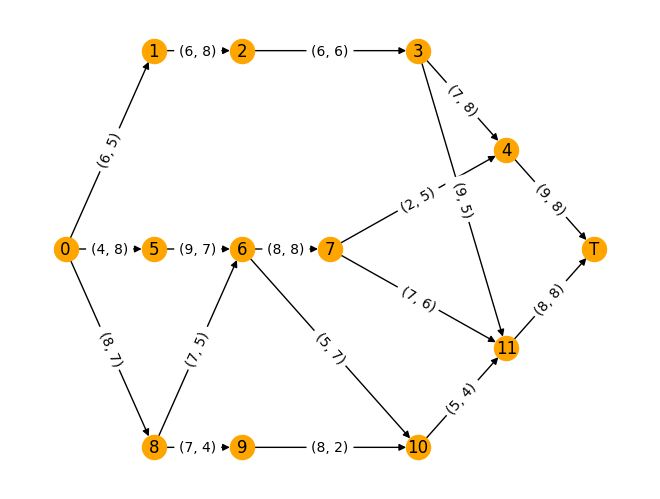

In [69]:
draw_graph(G)

### Множество альтернатив

In [70]:
def get_alters_set(name_graph):
  return [[data[::-1] for data in elem][::-1] for elem in list(nx.all_simple_edge_paths(name_graph, 0, 'T'))]

In [71]:
alters = get_alters_set(G)
alters

[[('T', 4), (4, 3), (3, 2), (2, 1), (1, 0)],
 [('T', 11), (11, 3), (3, 2), (2, 1), (1, 0)],
 [('T', 4), (4, 7), (7, 6), (6, 5), (5, 0)],
 [('T', 11), (11, 7), (7, 6), (6, 5), (5, 0)],
 [('T', 11), (11, 10), (10, 6), (6, 5), (5, 0)],
 [('T', 4), (4, 7), (7, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 7), (7, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 10), (10, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 10), (10, 9), (9, 8), (8, 0)]]

### Многокритериальная оптимизация

#### Значения векторной целевой функции

In [72]:
# Получение всевозможных значений векторной целевой функции из множества альтернатив
def get_Fx(index, name_graph):
  way = list(nx.all_simple_edge_paths(name_graph, 0, 'T'))[index]

  graph_edges = list(name_graph.edges(data=True))
  total_c, total_t = 0, 0

  for edge in graph_edges:
    if (edge[0], edge[1]) in way:
      total_c += edge[2]['cost']
      total_t += edge[2]['time']

  print(f'F(x{index+1}) = ({total_c}, {total_t})')

  return {'way': way, 'n': index + 1, 'time': total_t, 'cost': total_c}

In [73]:
cost_time_data = {}
for index in range(len(alters)):
  cost_time_data[index + 1] = get_Fx(index, G)

F(x1) = (34, 35)
F(x2) = (35, 32)
F(x3) = (32, 36)
F(x4) = (36, 37)
F(x5) = (31, 34)
F(x6) = (34, 33)
F(x7) = (38, 34)
F(x8) = (33, 31)
F(x9) = (36, 25)


In [74]:
cost_time_data

{1: {'way': [(0, 1), (1, 2), (2, 3), (3, 4), (4, 'T')],
  'n': 1,
  'time': 35,
  'cost': 34},
 2: {'way': [(0, 1), (1, 2), (2, 3), (3, 11), (11, 'T')],
  'n': 2,
  'time': 32,
  'cost': 35},
 3: {'way': [(0, 5), (5, 6), (6, 7), (7, 4), (4, 'T')],
  'n': 3,
  'time': 36,
  'cost': 32},
 4: {'way': [(0, 5), (5, 6), (6, 7), (7, 11), (11, 'T')],
  'n': 4,
  'time': 37,
  'cost': 36},
 5: {'way': [(0, 5), (5, 6), (6, 10), (10, 11), (11, 'T')],
  'n': 5,
  'time': 34,
  'cost': 31},
 6: {'way': [(0, 8), (8, 6), (6, 7), (7, 4), (4, 'T')],
  'n': 6,
  'time': 33,
  'cost': 34},
 7: {'way': [(0, 8), (8, 6), (6, 7), (7, 11), (11, 'T')],
  'n': 7,
  'time': 34,
  'cost': 38},
 8: {'way': [(0, 8), (8, 6), (6, 10), (10, 11), (11, 'T')],
  'n': 8,
  'time': 31,
  'cost': 33},
 9: {'way': [(0, 8), (8, 9), (9, 10), (10, 11), (11, 'T')],
  'n': 9,
  'time': 25,
  'cost': 36}}

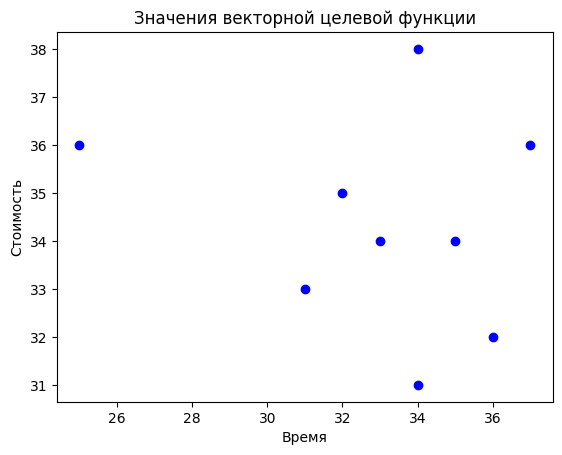

In [75]:
X, Y = [], []

for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])

plt.scatter(X, Y, color='blue')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Значения векторной целевой функции')

plt.show()

#### Построение Паретовского множества

In [76]:
def check_domination(w1, w2):
  if w1['cost'] <= w2['cost'] and w1['time'] < w2['time']:
    return True

  if w1['cost'] < w2['cost'] and w1['time'] <= w2['time']:
    return True

  return False

In [77]:
# Множество паретто
def get_Pareto_set(d):

  dom = [d[1]]
  ch = d[1]
  print(f'Добавляем к Паретовскому множеству путь №{ch["n"]}')
  n = 2
  F = True

  while n < len(d):
    ch = d[n]
    n += 1

    nn = 0
    while nn < len(dom):
      if check_domination(ch, dom[nn]):
        print(f'Путь №{dom[nn]["n"]} доминируется путём №{ch["n"]}, так что удаляем его из Паретовского множества')
        dom.pop(nn)
        continue

      if check_domination(dom[nn], ch):
        print(f'Путь №{ch["n"]} не подходит, поскольку доминируется путём №{dom[nn]["n"]}')
        break

      nn += 1

    else:
      print(f'Добавляем к Паретовскому множеству путь №{ch["n"]}')
      dom.append(ch)

  return dom

p_set = get_Pareto_set(cost_time_data)
print(*p_set, sep="\n")

Добавляем к Паретовскому множеству путь №1
Добавляем к Паретовскому множеству путь №2
Добавляем к Паретовскому множеству путь №3
Путь №4 не подходит, поскольку доминируется путём №1
Путь №1 доминируется путём №5, так что удаляем его из Паретовского множества
Путь №3 доминируется путём №5, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №5
Добавляем к Паретовскому множеству путь №6
Путь №7 не подходит, поскольку доминируется путём №2
Путь №2 доминируется путём №8, так что удаляем его из Паретовского множества
Путь №6 доминируется путём №8, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №8
{'way': [(0, 5), (5, 6), (6, 10), (10, 11), (11, 'T')], 'n': 5, 'time': 34, 'cost': 31}
{'way': [(0, 8), (8, 6), (6, 10), (10, 11), (11, 'T')], 'n': 8, 'time': 31, 'cost': 33}


#### Визуализация границ Паретовского множества

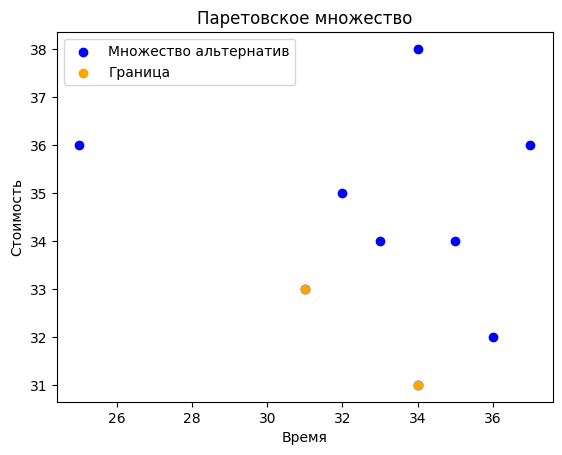

In [78]:
X, Y = [], []
for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])
# Построение первого графика
plt.scatter(X, Y, color='blue', label='Множество альтернатив')

X1, Y1 = [], []
for p in p_set:
  X1.append(p['time'])
  Y1.append(p['cost'])

# Построение второго графика
plt.scatter(X1, Y1, color='orange', label='Граница')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Паретовское множество')

plt.legend()

plt.show()

## Задание № 2

- выбрать любые 5 рёбер графа и изменить у каждого из них веса также на любые значения от 2 до 9.
- получить новое паретовское множество и границы.
- показать изменения с результатами из 1 задания.

In [79]:
def change_weights(lst_edges):
  for elem in lst_edges:
    time = random.randint(2, 9)
    cost = random.randint(2, 9)

    print(elem, f'Старое значение time = {G.edges[elem]["time"]}, новое = {time}', sep='\n')
    print(f'Старое значение cost = {G.edges[elem]["cost"]}, новое = {cost}\n')

    G.edges[elem]['time'] = time
    G.edges[elem]['cost'] = cost
    G.edges[elem]['weight'] = (cost, time)
  
  return 'Изменения в графе реализованы!'

### 1 итерация

In [80]:
lst_sample = random.sample(G.edges, 5)
lst_sample

[(5, 6), (7, 11), (6, 7), (6, 10), (8, 6)]

(5, 6)
Старое значение time = 7, новое = 7
Старое значение cost = 9, новое = 6

(7, 11)
Старое значение time = 6, новое = 2
Старое значение cost = 7, новое = 7

(6, 7)
Старое значение time = 8, новое = 7
Старое значение cost = 8, новое = 8

(6, 10)
Старое значение time = 7, новое = 7
Старое значение cost = 5, новое = 7

(8, 6)
Старое значение time = 5, новое = 2
Старое значение cost = 7, новое = 3



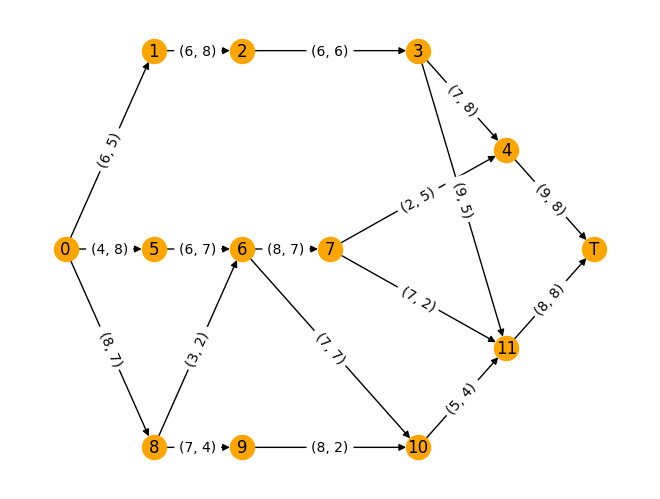

In [81]:
change_weights(lst_sample)
draw_graph(G)

In [82]:
alters = get_alters_set(G)
alters

[[('T', 4), (4, 3), (3, 2), (2, 1), (1, 0)],
 [('T', 11), (11, 3), (3, 2), (2, 1), (1, 0)],
 [('T', 4), (4, 7), (7, 6), (6, 5), (5, 0)],
 [('T', 11), (11, 7), (7, 6), (6, 5), (5, 0)],
 [('T', 11), (11, 10), (10, 6), (6, 5), (5, 0)],
 [('T', 4), (4, 7), (7, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 7), (7, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 10), (10, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 10), (10, 9), (9, 8), (8, 0)]]

In [83]:
cost_time_data = {}
for index in range(len(alters)):
  cost_time_data[index + 1] = get_Fx(index, G)

F(x1) = (34, 35)
F(x2) = (35, 32)
F(x3) = (29, 35)
F(x4) = (33, 32)
F(x5) = (30, 34)
F(x6) = (30, 29)
F(x7) = (34, 26)
F(x8) = (31, 28)
F(x9) = (36, 25)


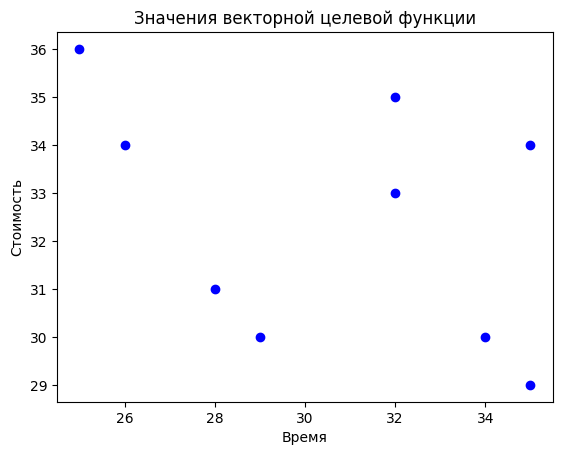

In [84]:
X, Y = [], []

for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])

plt.scatter(X, Y, color='blue')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Значения векторной целевой функции')

plt.show()

In [85]:
p_set = get_Pareto_set(cost_time_data)
print(*p_set, sep="\n")

Добавляем к Паретовскому множеству путь №1
Добавляем к Паретовскому множеству путь №2
Путь №1 доминируется путём №3, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №3
Путь №2 доминируется путём №4, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №4
Добавляем к Паретовскому множеству путь №5
Путь №4 доминируется путём №6, так что удаляем его из Паретовского множества
Путь №5 доминируется путём №6, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №6
Добавляем к Паретовскому множеству путь №7
Добавляем к Паретовскому множеству путь №8
{'way': [(0, 5), (5, 6), (6, 7), (7, 4), (4, 'T')], 'n': 3, 'time': 35, 'cost': 29}
{'way': [(0, 8), (8, 6), (6, 7), (7, 4), (4, 'T')], 'n': 6, 'time': 29, 'cost': 30}
{'way': [(0, 8), (8, 6), (6, 7), (7, 11), (11, 'T')], 'n': 7, 'time': 26, 'cost': 34}
{'way': [(0, 8), (8, 6), (6, 10), (10, 11), (11, 'T')], 'n': 8, 'time': 28, 'cost': 31}


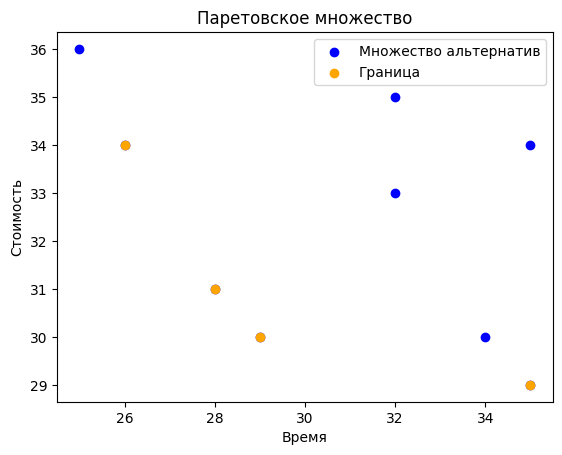

In [86]:
X, Y = [], []
for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])
# Построение первого графика
plt.scatter(X, Y, color='blue', label='Множество альтернатив')

X1, Y1 = [], []
for p in p_set:
  X1.append(p['time'])
  Y1.append(p['cost'])

# Построение второго графика
plt.scatter(X1, Y1, color='orange', label='Граница')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Паретовское множество')

plt.legend()

plt.show()

После 1 смены весов у рёбер заметно расширение границ Паретовского множества и небольшое приближение к началу координат.

### 2 итерация

In [87]:
lst_sample = random.sample(G.edges, 5)
lst_sample

[(7, 4), (8, 6), (8, 9), (0, 1), (0, 8)]

(7, 4)
Старое значение time = 5, новое = 4
Старое значение cost = 2, новое = 6

(8, 6)
Старое значение time = 2, новое = 4
Старое значение cost = 3, новое = 2

(8, 9)
Старое значение time = 4, новое = 4
Старое значение cost = 7, новое = 9

(0, 1)
Старое значение time = 5, новое = 4
Старое значение cost = 6, новое = 8

(0, 8)
Старое значение time = 7, новое = 7
Старое значение cost = 8, новое = 4



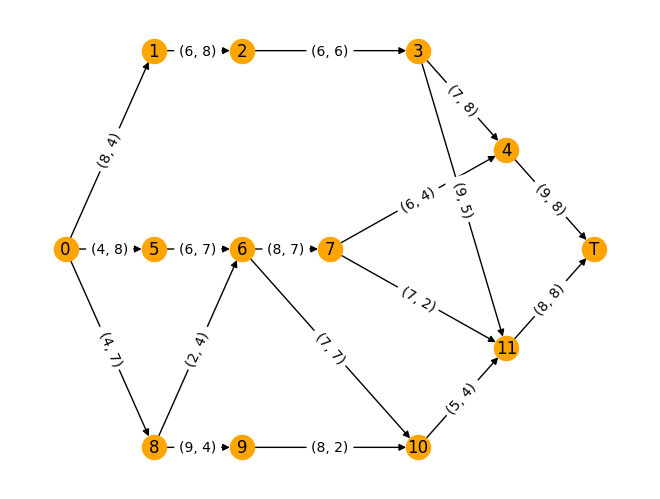

In [88]:
change_weights(lst_sample)
draw_graph(G)

In [89]:
alters = get_alters_set(G)
alters

[[('T', 4), (4, 3), (3, 2), (2, 1), (1, 0)],
 [('T', 11), (11, 3), (3, 2), (2, 1), (1, 0)],
 [('T', 4), (4, 7), (7, 6), (6, 5), (5, 0)],
 [('T', 11), (11, 7), (7, 6), (6, 5), (5, 0)],
 [('T', 11), (11, 10), (10, 6), (6, 5), (5, 0)],
 [('T', 4), (4, 7), (7, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 7), (7, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 10), (10, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 10), (10, 9), (9, 8), (8, 0)]]

In [90]:
cost_time_data = {}
for index in range(len(alters)):
  cost_time_data[index + 1] = get_Fx(index, G)

F(x1) = (36, 34)
F(x2) = (37, 31)
F(x3) = (33, 34)
F(x4) = (33, 32)
F(x5) = (30, 34)
F(x6) = (29, 30)
F(x7) = (29, 28)
F(x8) = (26, 30)
F(x9) = (34, 25)


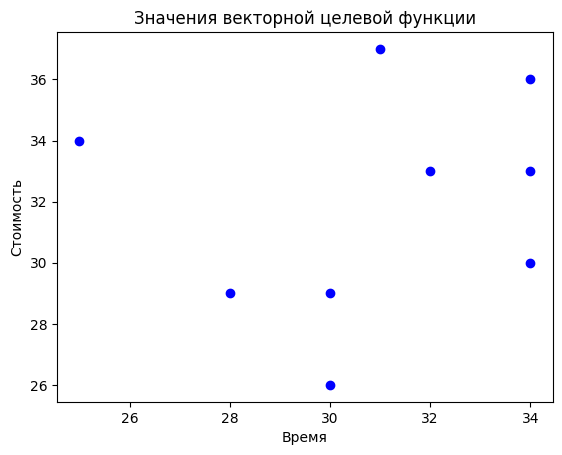

In [91]:
X, Y = [], []

for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])

plt.scatter(X, Y, color='blue')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Значения векторной целевой функции')

plt.show()

In [92]:
p_set = get_Pareto_set(cost_time_data)
print(*p_set, sep="\n")

Добавляем к Паретовскому множеству путь №1
Добавляем к Паретовскому множеству путь №2
Путь №1 доминируется путём №3, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №3
Путь №3 доминируется путём №4, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №4
Добавляем к Паретовскому множеству путь №5
Путь №2 доминируется путём №6, так что удаляем его из Паретовского множества
Путь №4 доминируется путём №6, так что удаляем его из Паретовского множества
Путь №5 доминируется путём №6, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №6
Путь №6 доминируется путём №7, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №7
Добавляем к Паретовскому множеству путь №8
{'way': [(0, 8), (8, 6), (6, 7), (7, 11), (11, 'T')], 'n': 7, 'time': 28, 'cost': 29}
{'way': [(0, 8), (8, 6), (6, 10), (10, 11), (11, 'T')], 'n': 8, 'time': 30, 'cost': 26}


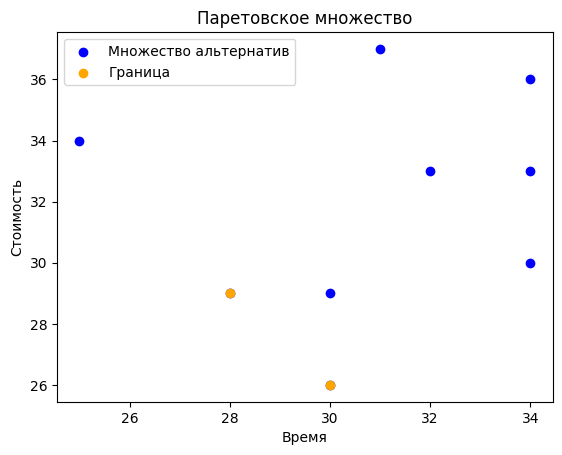

In [93]:
X, Y = [], []
for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])
# Построение первого графика
plt.scatter(X, Y, color='blue', label='Множество альтернатив')

X1, Y1 = [], []
for p in p_set:
  X1.append(p['time'])
  Y1.append(p['cost'])

# Построение второго графика
plt.scatter(X1, Y1, color='orange', label='Граница')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Паретовское множество')

plt.legend()

plt.show()

После уже 2 смены весов у рёбер видно аналогичное медленное приближение границ Паретовского множества к началу координат с уменьшением количества граничащих точек.

### 3 итерация

In [94]:
lst_sample = random.sample(G.edges, 5)
lst_sample

[(11, 'T'), (3, 11), (3, 4), (10, 11), (0, 5)]

(11, 'T')
Старое значение time = 8, новое = 5
Старое значение cost = 8, новое = 8

(3, 11)
Старое значение time = 5, новое = 4
Старое значение cost = 9, новое = 5

(3, 4)
Старое значение time = 8, новое = 3
Старое значение cost = 7, новое = 7

(10, 11)
Старое значение time = 4, новое = 4
Старое значение cost = 5, новое = 2

(0, 5)
Старое значение time = 8, новое = 7
Старое значение cost = 4, новое = 4



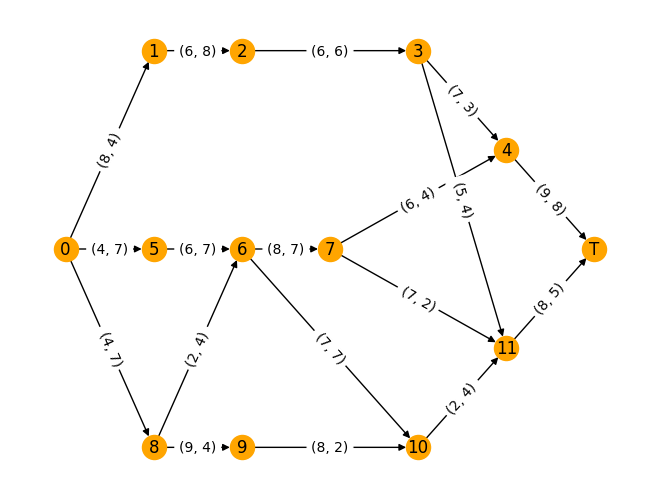

In [95]:
change_weights(lst_sample)
draw_graph(G)

In [96]:
alters = get_alters_set(G)
alters

[[('T', 4), (4, 3), (3, 2), (2, 1), (1, 0)],
 [('T', 11), (11, 3), (3, 2), (2, 1), (1, 0)],
 [('T', 4), (4, 7), (7, 6), (6, 5), (5, 0)],
 [('T', 11), (11, 7), (7, 6), (6, 5), (5, 0)],
 [('T', 11), (11, 10), (10, 6), (6, 5), (5, 0)],
 [('T', 4), (4, 7), (7, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 7), (7, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 10), (10, 6), (6, 8), (8, 0)],
 [('T', 11), (11, 10), (10, 9), (9, 8), (8, 0)]]

In [97]:
cost_time_data = {}
for index in range(len(alters)):
  cost_time_data[index + 1] = get_Fx(index, G)

F(x1) = (36, 29)
F(x2) = (33, 27)
F(x3) = (33, 33)
F(x4) = (33, 28)
F(x5) = (27, 30)
F(x6) = (29, 30)
F(x7) = (29, 25)
F(x8) = (23, 27)
F(x9) = (31, 22)


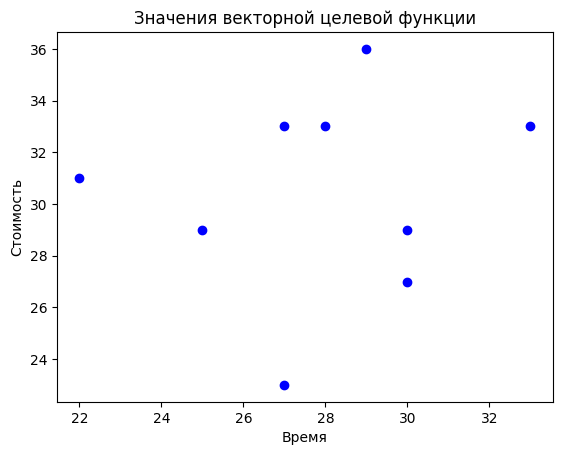

In [98]:
X, Y = [], []

for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])

plt.scatter(X, Y, color='blue')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Значения векторной целевой функции')

plt.show()

In [99]:
p_set = get_Pareto_set(cost_time_data)
print(*p_set, sep="\n")

Добавляем к Паретовскому множеству путь №1
Путь №1 доминируется путём №2, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №2
Путь №3 не подходит, поскольку доминируется путём №2
Путь №4 не подходит, поскольку доминируется путём №2
Добавляем к Паретовскому множеству путь №5
Путь №6 не подходит, поскольку доминируется путём №5
Путь №2 доминируется путём №7, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №7
Путь №5 доминируется путём №8, так что удаляем его из Паретовского множества
Добавляем к Паретовскому множеству путь №8
{'way': [(0, 8), (8, 6), (6, 7), (7, 11), (11, 'T')], 'n': 7, 'time': 25, 'cost': 29}
{'way': [(0, 8), (8, 6), (6, 10), (10, 11), (11, 'T')], 'n': 8, 'time': 27, 'cost': 23}


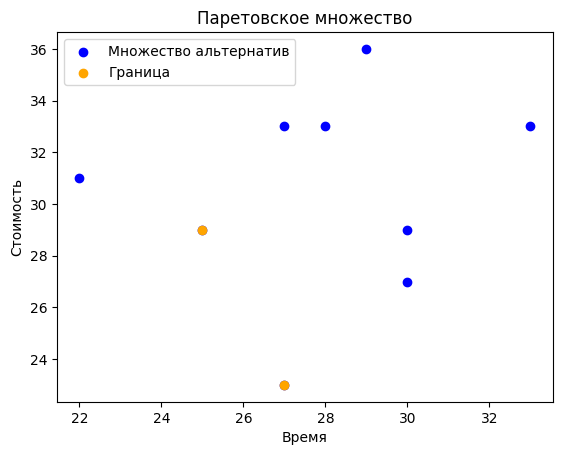

In [100]:
X, Y = [], []
for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])
# Построение первого графика
plt.scatter(X, Y, color='blue', label='Множество альтернатив')

X1, Y1 = [], []
for p in p_set:
  X1.append(p['time'])
  Y1.append(p['cost'])

# Построение второго графика
plt.scatter(X1, Y1, color='orange', label='Граница')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Паретовское множество')

plt.legend()

plt.show()

После уже 3 смены весов рёбер графа особых различий не заметно, Паретовское множество всё также близко к началу координат. 

## Задание № 3

- взять изначальный граф из 1 задания и удалить у него любые 2 ребра.
- добавить новые 2 ребра.
- построить новое паретовское множество границы.
- показать изменения с результатами из прошлых заданий.

In [101]:
print("Рёбра скопированного графа N вместе со множеством весов:")
for edge in N.edges(data=True):
  print(edge, end='\n')
print()

Рёбра скопированного графа N вместе со множеством весов:
(0, 1, {'cost': 6, 'time': 5, 'weight': (6, 5)})
(0, 5, {'cost': 4, 'time': 8, 'weight': (4, 8)})
(0, 8, {'cost': 8, 'time': 7, 'weight': (8, 7)})
(1, 2, {'cost': 6, 'time': 8, 'weight': (6, 8)})
(5, 6, {'cost': 9, 'time': 7, 'weight': (9, 7)})
(8, 6, {'cost': 7, 'time': 5, 'weight': (7, 5)})
(8, 9, {'cost': 7, 'time': 4, 'weight': (7, 4)})
(2, 3, {'cost': 6, 'time': 6, 'weight': (6, 6)})
(3, 4, {'cost': 7, 'time': 8, 'weight': (7, 8)})
(3, 11, {'cost': 9, 'time': 5, 'weight': (9, 5)})
(4, 'T', {'cost': 9, 'time': 8, 'weight': (9, 8)})
(11, 'T', {'cost': 8, 'time': 8, 'weight': (8, 8)})
(6, 7, {'cost': 8, 'time': 8, 'weight': (8, 8)})
(6, 10, {'cost': 5, 'time': 7, 'weight': (5, 7)})
(7, 4, {'cost': 2, 'time': 5, 'weight': (2, 5)})
(7, 11, {'cost': 7, 'time': 6, 'weight': (7, 6)})
(10, 11, {'cost': 5, 'time': 4, 'weight': (5, 4)})
(9, 10, {'cost': 8, 'time': 2, 'weight': (8, 2)})



In [102]:
def change_edges(lst_remv, lst_add):

  print("Изначальное состояние графа перед изменениями:")
  print()
  draw_graph(N)
  print()

  # Удаление двух ребер
  N.remove_edge(lst_remv[0][0], lst_remv[0][1])
  N.remove_edge(lst_remv[1][0], lst_remv[1][1])

  print("Граф после удаления 2 случайных рёбер:")
  print()
  draw_graph(N)
  print()

  # Добавление двух новых ребер
  N.add_edge(lst_add[0][0], lst_add[0][1])
  N.add_edge(sample_add[1][0], lst_add[1][1])

  # Генерация новых весов у новых рёбер
  time = random.randint(2, 9)
  cost = random.randint(2, 9)
  N.edges[lst_add[0]]['time'] = time
  N.edges[lst_add[0]]['cost'] = cost
  N.edges[lst_add[0]]['weight'] = (time, cost)

  time = random.randint(2, 9)
  cost = random.randint(2, 9)
  N.edges[lst_add[1]]['time'] = time
  N.edges[lst_add[1]]['cost'] = cost
  N.edges[lst_add[1]]['weight'] = (time, cost)

  print("Граф после добавления 2 случайных рёбер со случайными весами:")
  print()
  draw_graph(N)

  return 'Изменения в графе реализованы!'

In [103]:
lst_beg = list(N.nodes)
lst_beg.remove('T')

lst_end = list(N.nodes)
lst_end.remove(0)

lst_beg, lst_end

([0, 1, 5, 8, 2, 3, 4, 11, 6, 7, 10, 9],
 [1, 5, 8, 2, 3, 4, 11, 'T', 6, 7, 10, 9])

### 1 итерация

In [104]:
sample_remove = random.sample(N.edges, 2)
sample_add = [(random.choice(lst_beg), random.choice(lst_end)) for _ in range(2)]

sample_remove, sample_add

([(0, 8), (4, 'T')], [(9, 5), (10, 8)])

Изначальное состояние графа перед изменениями:



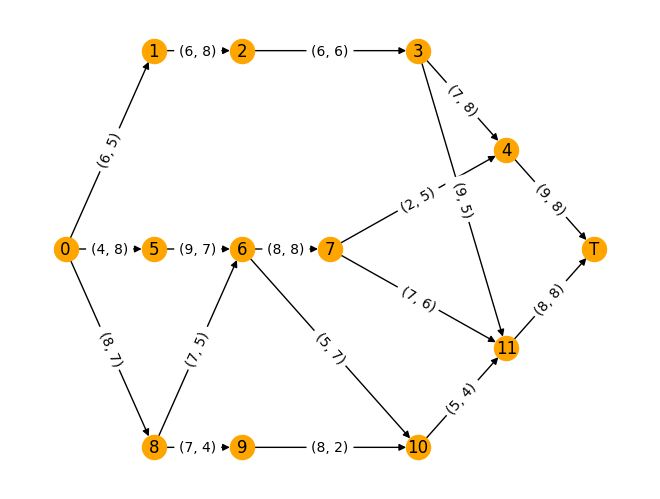


Граф после удаления 2 случайных рёбер:



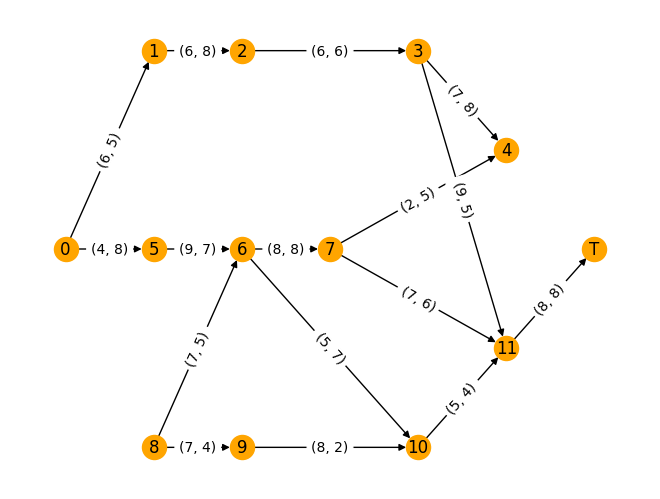


Граф после добавления 2 случайных рёбер со случайными весами:



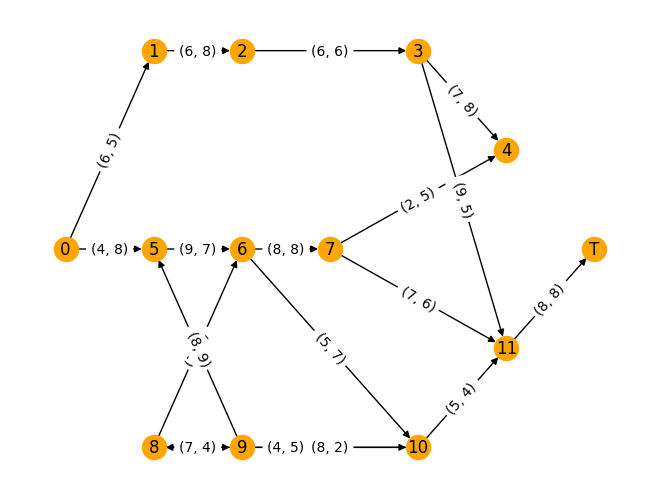

'Изменения в графе реализованы!'

In [105]:
change_edges(sample_remove, sample_add)

In [106]:
alters = get_alters_set(N)
alters

[[('T', 11), (11, 3), (3, 2), (2, 1), (1, 0)],
 [('T', 11), (11, 7), (7, 6), (6, 5), (5, 0)],
 [('T', 11), (11, 10), (10, 6), (6, 5), (5, 0)]]

In [107]:
cost_time_data = {}
for index in range(len(alters)):
  cost_time_data[index + 1] = get_Fx(index, N)

F(x1) = (35, 32)
F(x2) = (36, 37)
F(x3) = (31, 34)


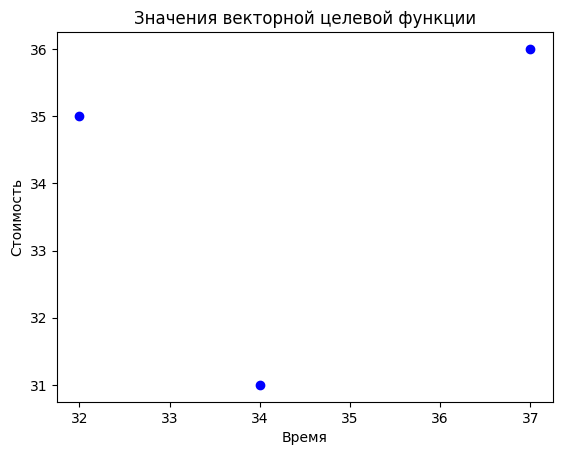

In [108]:
X, Y = [], []

for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])

plt.scatter(X, Y, color='blue')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Значения векторной целевой функции')

plt.show()

In [109]:
p_set = get_Pareto_set(cost_time_data)
print(*p_set, sep="\n")

Добавляем к Паретовскому множеству путь №1
Путь №2 не подходит, поскольку доминируется путём №1
{'way': [(0, 1), (1, 2), (2, 3), (3, 11), (11, 'T')], 'n': 1, 'time': 32, 'cost': 35}


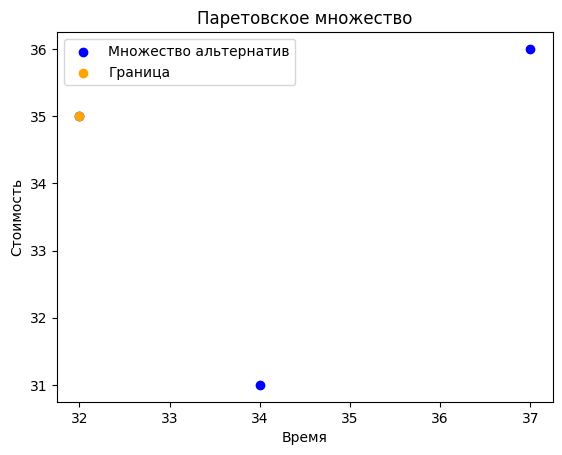

In [110]:
X, Y = [], []
for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])
# Построение первого графика
plt.scatter(X, Y, color='blue', label='Множество альтернатив')

X1, Y1 = [], []
for p in p_set:
  X1.append(p['time'])
  Y1.append(p['cost'])

# Построение второго графика
plt.scatter(X1, Y1, color='orange', label='Граница')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Паретовское множество')

plt.legend()

plt.show()

После 1 смены расположения рёбер у изначального графа G различий становится больше:
- значительно уменьшилось множество альтернатив графа.
- аналогично уменьшилось в объёме Паретовское множество по отношению к первоначальному результату.

### 2 итерация

In [111]:
sample_remove = random.sample(N.edges, 2)
sample_add = [(random.choice(lst_beg), random.choice(lst_end)) for _ in range(2)]

sample_remove, sample_add

([(7, 11), (3, 11)], [(8, 1), (3, 7)])

Изначальное состояние графа перед изменениями:



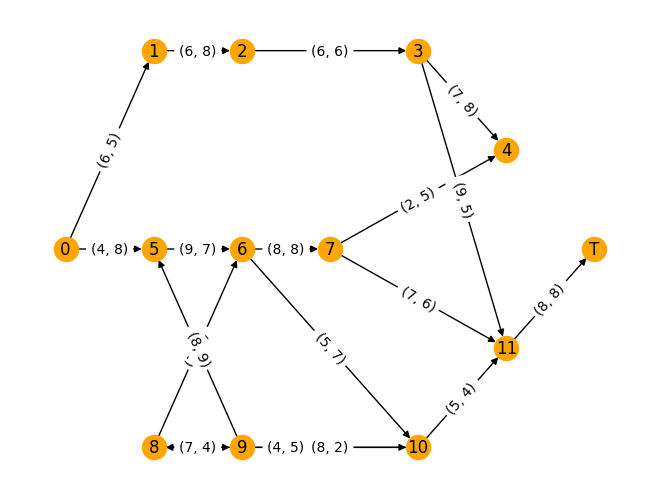


Граф после удаления 2 случайных рёбер:



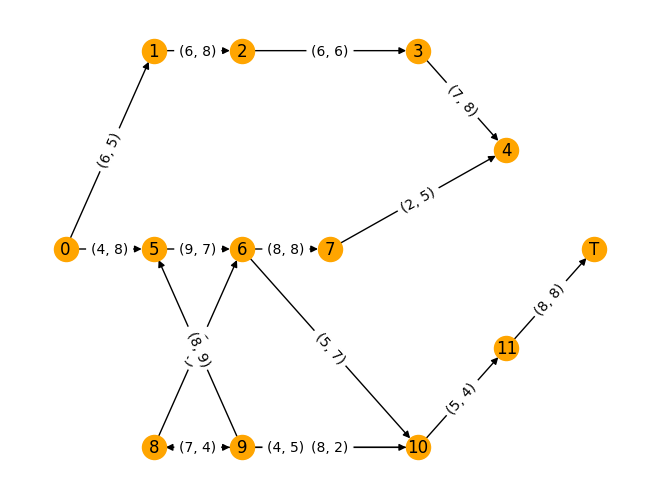


Граф после добавления 2 случайных рёбер со случайными весами:



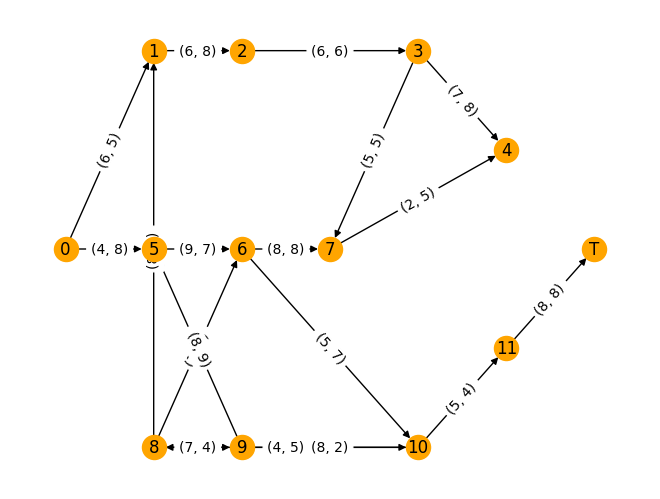

'Изменения в графе реализованы!'

In [112]:
change_edges(sample_remove, sample_add)

In [113]:
alters = get_alters_set(N)
alters

[[('T', 11), (11, 10), (10, 6), (6, 5), (5, 0)]]

In [114]:
cost_time_data = {}
for index in range(len(alters)):
  cost_time_data[index + 1] = get_Fx(index, N)

F(x1) = (31, 34)


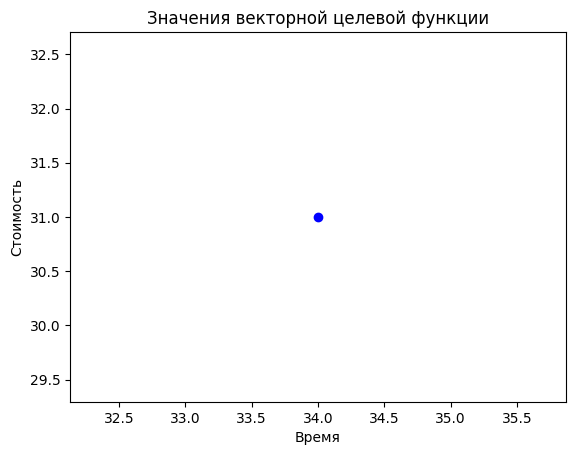

In [115]:
X, Y = [], []

for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])

plt.scatter(X, Y, color='blue')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Значения векторной целевой функции')

plt.show()

In [116]:
p_set = get_Pareto_set(cost_time_data)
print(*p_set, sep="\n")

Добавляем к Паретовскому множеству путь №1
{'way': [(0, 5), (5, 6), (6, 10), (10, 11), (11, 'T')], 'n': 1, 'time': 34, 'cost': 31}


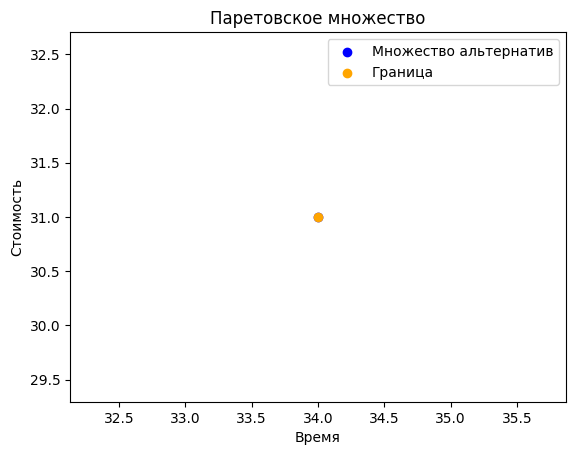

In [117]:
X, Y = [], []
for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])
# Построение первого графика
plt.scatter(X, Y, color='blue', label='Множество альтернатив')

X1, Y1 = [], []
for p in p_set:
  X1.append(p['time'])
  Y1.append(p['cost'])

# Построение второго графика
plt.scatter(X1, Y1, color='orange', label='Граница')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Паретовское множество')

plt.legend()

plt.show()

После 2 смены расположения рёбер графа N Паретовское множество и множество альтернатив свелись к 1 точке.

### 3 итерация

In [118]:
sample_remove = random.sample(N.edges, 2)
sample_add = [(random.choice(lst_beg), random.choice(lst_end)) for _ in range(2)]

sample_remove, sample_add

([(3, 7), (10, 8)], [(0, 6), (3, 7)])

Изначальное состояние графа перед изменениями:



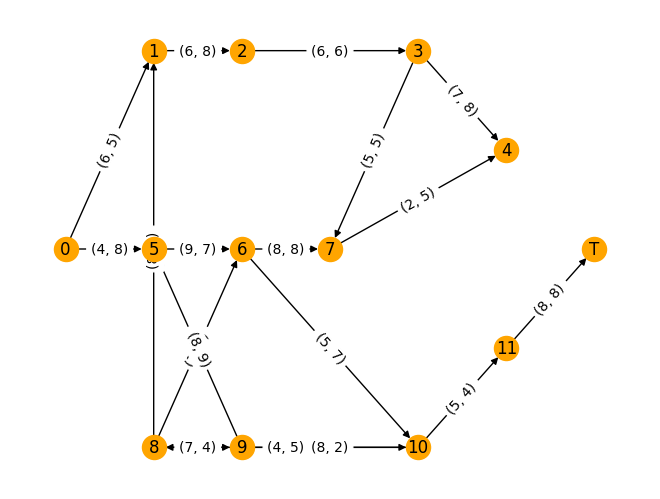


Граф после удаления 2 случайных рёбер:



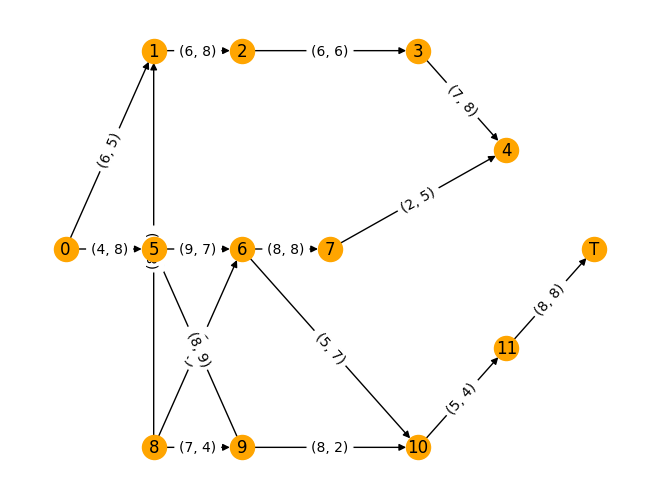


Граф после добавления 2 случайных рёбер со случайными весами:



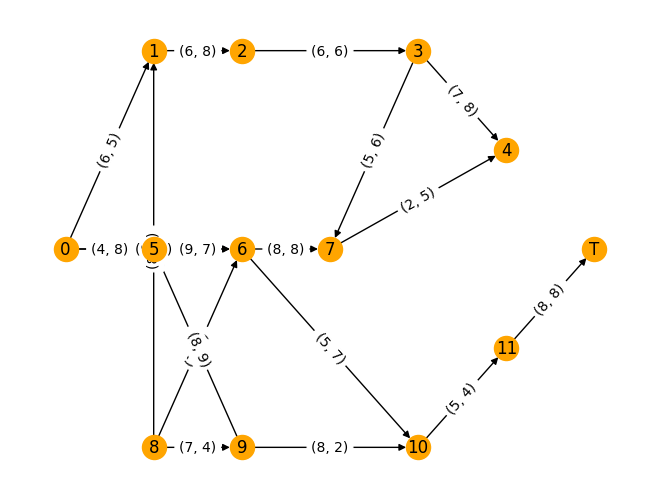

'Изменения в графе реализованы!'

In [119]:
change_edges(sample_remove, sample_add)

In [120]:
alters = get_alters_set(N)
alters

[[('T', 11), (11, 10), (10, 6), (6, 5), (5, 0)],
 [('T', 11), (11, 10), (10, 6), (6, 0)]]

In [121]:
cost_time_data = {}
for index in range(len(alters)):
  cost_time_data[index + 1] = get_Fx(index, N)

F(x1) = (31, 34)
F(x2) = (21, 28)


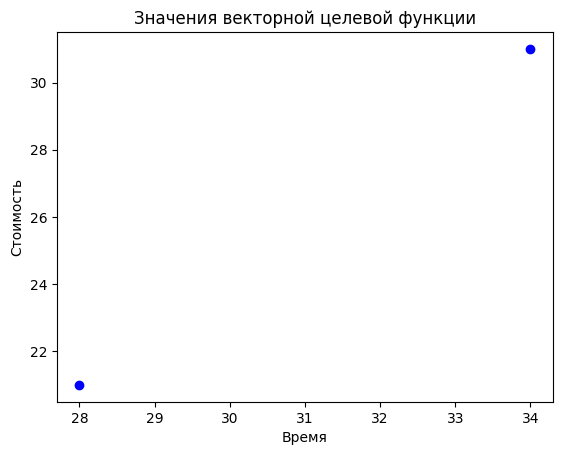

In [122]:
X, Y = [], []

for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])

plt.scatter(X, Y, color='blue')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Значения векторной целевой функции')

plt.show()

In [123]:
p_set = get_Pareto_set(cost_time_data)
print(*p_set, sep="\n")

Добавляем к Паретовскому множеству путь №1
{'way': [(0, 5), (5, 6), (6, 10), (10, 11), (11, 'T')], 'n': 1, 'time': 34, 'cost': 31}


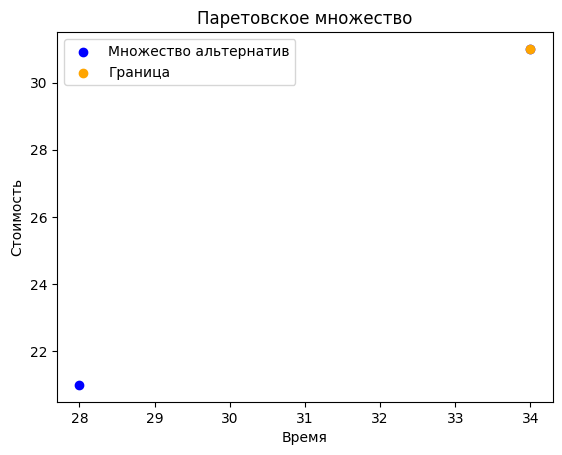

In [124]:
X, Y = [], []
for key in cost_time_data.keys():
  X.append(cost_time_data[key]['time'])
  Y.append(cost_time_data[key]['cost'])
# Построение первого графика
plt.scatter(X, Y, color='blue', label='Множество альтернатив')

X1, Y1 = [], []
for p in p_set:
  X1.append(p['time'])
  Y1.append(p['cost'])

# Построение второго графика
plt.scatter(X1, Y1, color='orange', label='Граница')

# Настройка осей и заголовка
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Паретовское множество')

plt.legend()

plt.show()

После 3 смены расположения рёбер графа N множество альтернатив незначительно увеличилось, а Паретовское множество изменило своё расположение относительно начала координат.

## Комментарии по общему результату

### Задание № 2

В результате нескольких итераций манипуляций над весами рёбер у графа Паретовское множество по границам менялось в объёме и в большинстве случаев приближалось к началу координат, что в целом показывает уменьшение оптимальных для системы вариантов со всеми рассматриваемыми в ней критериями.

Это может свидетельствовать о следующем:

- Имеется ограниченность ресурсов, которая мешает достижению намеченных оптимальных результатов по всем критериям одновременно. При этом оптимальное решение по одному критерию может привести к ухудшению других критериев системы.

- Есть возможная потребность сделать компромиссные решения в разрезе различных критериев системы. Не всегда возможно достичь оптимального результата по всем критериям одновременно, поэтому могут потребоваться компромиссы и взвешивание различных факторов.

- Ещё есть возможность достичь лучших результатов по рассматриваемым критериям, путем исследования и разработки новых решений или стратегий.

### Задание № 3

В результате этих итераций манипуляций над расположением рёбер и вытекающим его изменением у графа Паретовское множество и множество альтернатив значительно менялось в объёме и расположении относительно начала координат (в значительной степени уменьшалось), что в целом намекает на изменение условий и ограничений задачи многокритериальной оптимизации. Важно уделить внимание анализу и интерпретации результатов и возможностей для улучшения решений в рамках новых условий.

Это также может свидетельствовать о следующем:

- Снижается общее состояние системы с вытекающим недостатком эффективных решений системы и доступностью к оптимальным её решениям.

- Вероятный намёк на уточнение или улучшение результатов в рамках рассматриваемых критериев. Удаляются доминирующие или недопустимые решения, что помогает более точно определить оптимальные варианты решения системы. 

- Проблема решения системы может усугубиться и привести с собой новые ограничения или факторы, приводящие к уменьшению количества допустимых оптимальных решений.